<a href="https://colab.research.google.com/github/sushgho/Msc-Project/blob/master/AI_Assisted_Sentiment_Analysis_of_Hotel_Reviews_Using_Topic_Modeling(Sentiment_Analysis)_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Assisted Sentiment Analysis of Hotel Reviews Using Topic Modeling**-- Part 2 (Sentiment Analysis)

**Classification and evaluation using Machine Learning **

**Libraries**

In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
import re                                       # regular expressions
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# To do preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# To do preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

# from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np # To compute the average results

from random import shuffle # To shuffle the dataset


# To use feature selection in the Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from collections import Counter
import pandas as pd
import gensim
#packages for processing data
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import numpy as np
import nltk
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

from collections import Counter
#from sklearn.feature_extraction.text import CountVectorizer

#packages to process data
import pandas as pd
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora

#display results
from IPython.display import display, HTML
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data]

**Importing Data (Output generated from LDA)**

In [2]:
# Import Dataset
reviews = pd.read_csv('dominent1 (1).txt', engine='python',error_bad_lines=False)
#data = pd.read_csv('reviews_Hotel11.csv', engine='python',error_bad_lines=False)
#print(df.Topic.unique())
reviews


,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Review_Title,Review Rating,dominant_topic_Label
0,0,0,10.0,0.2093,"walk, close, station, easy, minute, train, cit...",pleasure this nights recently. This perfect ev...,5.0,"Facilities,Location"
1,1,1,11.0,0.3978,"amazing, definitely, would, recommend, wonderf...",very lovely first visit this iconic bar! Wonde...,5.0,Service
2,2,2,5.0,0.3910,"staff, location, breakfast, friendly, helpful,...","Rhodes Hotel nights, location taking Paddingto...",4.0,Staff
3,3,3,6.0,0.1827,"feel, make, always, special, smile, home, welc...",Form moment arrived until left experienced abs...,5.0,"Food, Service"
4,4,4,0.0,0.6617,"check, book, give, reception, night, ask, take...",Well strange London's 5star when comes along e...,1.0,Facilities
...,...,...,...,...,...,...,...,...
299995,299995,299995,5.0,0.3264,"staff, location, breakfast, friendly, helpful,...",sauna Jacuzzi Staff were very helpful with tou...,5.0,Staff
299996,299996,299996,5.0,0.2948,"staff, location, breakfast, friendly, helpful,...",Poor wifi connection Staff cleanliness,4.1,Staff
299997,299997,299997,5.0,0.3911,"staff, location, breakfast, friendly, helpful,...",minute walk closest metro Very Friendly staff ...,5.1,Staff
299998,299998,299998,5.0,0.2764,"staff, location, breakfast, friendly, helpful,...",shower cold near beach metro station walking,3.5,Staff


**Initialising Sentiments to Reiew**

In [3]:
reviews['Review_Rate'] = reviews['Review Rating'].apply(lambda c: 'pos' if c >=4.0 else ('neg' if c <=2.0 else 'neu'))

In [4]:
#r1=reviews[['Review_Title','Review Rating','dominant_topic_Label','Dominant_Topic',	'Topic_Perc_Contrib']]

r1=reviews[['Review_Title','Review Rating','Dominant_Topic',	'Topic_Perc_Contrib','dominant_topic_Label']]
r1

,Review_Title,Review Rating,Dominant_Topic,Topic_Perc_Contrib,dominant_topic_Label
0,pleasure this nights recently. This perfect ev...,5.0,10.0,0.2093,"Facilities,Location"
1,very lovely first visit this iconic bar! Wonde...,5.0,11.0,0.3978,Service
2,"Rhodes Hotel nights, location taking Paddingto...",4.0,5.0,0.3910,Staff
3,Form moment arrived until left experienced abs...,5.0,6.0,0.1827,"Food, Service"
4,Well strange London's 5star when comes along e...,1.0,0.0,0.6617,Facilities
...,...,...,...,...,...
299995,sauna Jacuzzi Staff were very helpful with tou...,5.0,5.0,0.3264,Staff
299996,Poor wifi connection Staff cleanliness,4.1,5.0,0.2948,Staff
299997,minute walk closest metro Very Friendly staff ...,5.1,5.0,0.3911,Staff
299998,shower cold near beach metro station walking,3.5,5.0,0.2764,Staff


In [5]:
r1['Review_Rate'] = reviews['Review Rating'].apply(lambda c: 'pos' if c >=4 else ('neg' if c <=2 else 'neu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
r1

,Review_Title,Review Rating,Dominant_Topic,Topic_Perc_Contrib,dominant_topic_Label,Review_Rate
0,pleasure this nights recently. This perfect ev...,5.0,10.0,0.2093,"Facilities,Location",pos
1,very lovely first visit this iconic bar! Wonde...,5.0,11.0,0.3978,Service,pos
2,"Rhodes Hotel nights, location taking Paddingto...",4.0,5.0,0.3910,Staff,pos
3,Form moment arrived until left experienced abs...,5.0,6.0,0.1827,"Food, Service",pos
4,Well strange London's 5star when comes along e...,1.0,0.0,0.6617,Facilities,neg
...,...,...,...,...,...,...
299995,sauna Jacuzzi Staff were very helpful with tou...,5.0,5.0,0.3264,Staff,pos
299996,Poor wifi connection Staff cleanliness,4.1,5.0,0.2948,Staff,pos
299997,minute walk closest metro Very Friendly staff ...,5.1,5.0,0.3911,Staff,pos
299998,shower cold near beach metro station walking,3.5,5.0,0.2764,Staff,neu


Topic contribution of document

In [7]:
r2=r1[['Review_Title','Review_Rate','dominant_topic_Label','Dominant_Topic','Topic_Perc_Contrib']]
r2

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib
0,pleasure this nights recently. This perfect ev...,pos,"Facilities,Location",10.0,0.2093
1,very lovely first visit this iconic bar! Wonde...,pos,Service,11.0,0.3978
2,"Rhodes Hotel nights, location taking Paddingto...",pos,Staff,5.0,0.3910
3,Form moment arrived until left experienced abs...,pos,"Food, Service",6.0,0.1827
4,Well strange London's 5star when comes along e...,neg,Facilities,0.0,0.6617
...,...,...,...,...,...
299995,sauna Jacuzzi Staff were very helpful with tou...,pos,Staff,5.0,0.3264
299996,Poor wifi connection Staff cleanliness,pos,Staff,5.0,0.2948
299997,minute walk closest metro Very Friendly staff ...,pos,Staff,5.0,0.3911
299998,shower cold near beach metro station walking,neu,Staff,5.0,0.2764


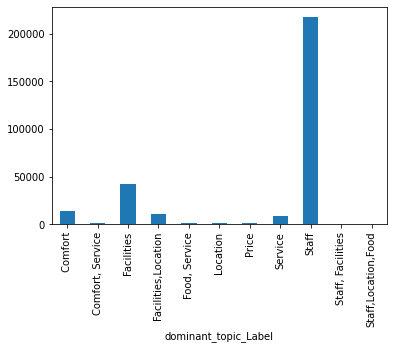

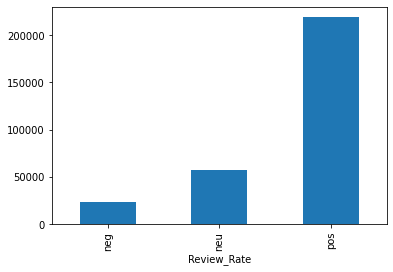

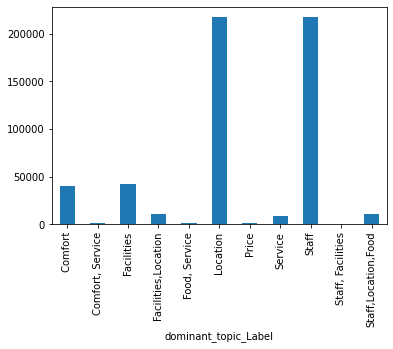

In [8]:
r2.groupby('dominant_topic_Label').Review_Title.count().plot.bar(ylim=0)

plt.show()
r2.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()
r2.groupby('Dominant_Topic').Review_Title.count().plot.bar(ylim=0)
r2.groupby('dominant_topic_Label').Review_Title.count().plot.bar(xlim=0)
plt.show()

**Pre-processing**

In [9]:
#pos tagging
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [10]:

def preProcess(text):
    # should return a list of tokens
    
    # word tokenisation, including punctuation removal
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    # lowercasing
    tokens = [t.lower() for t in tokens]

    # stopword removal- benefits are it removes rare words, though bad for bigram relations
    stop = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop]

    # remove numbers and empty space
    digits = '0123456789'
    text = [t for t in text if t not in digits]

    
    
    # lemmatisation
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    tokens = [t for t in tokens if t] # ensure no empty space
    
    return tokens
    

In [11]:

def create_bigrams(word):
    bigram = gensim.models.Phrases(word, min_count=2, threshold=30)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
    

In [12]:
Processing=r2['Review_Title'].astype(str)

In [13]:
r2['processed'] = Processing.apply(preProcess)


In [2]:
r2.astype(str)

NameError: ignored

In [15]:
r3=r2['dominant_topic_Label'].astype(str)

In [16]:
r4=r2['Dominant_Topic'].astype(str)

In [17]:
'''
selection = ['5.0']

mask = r4.apply(lambda x: any(item for item in selection if item in x))
dfTopic_5= r2[mask]
dfTopic_5
'''

"\nselection = ['5.0']\n\nmask = r4.apply(lambda x: any(item for item in selection if item in x))\ndfTopic_5= r2[mask]\ndfTopic_5\n"

In [18]:
'''
dfTopic_5.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()
'''

"\ndfTopic_5.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)\nplt.show()\n"

In [19]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In_var = r2.processed[:217470].astype(str)
dep_var = dfTopic_5.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=225)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

tvec = TfidfVectorizer()
clf3 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions_LR = model1.predict(X_test)
confusion_matrix_LR = (predictions_LR,y_test)

print('\nAccuracy Staff LR:', accuracy_score(predictions_LR,y_test))
print('Precission :', precision_score(predictions_LR,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_LR,y_test,average='weighted'))

print(confusion_matrix(y_test, predictions_LR))
print(classification_report(y_test,predictions_LR))
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, predictions_LR, color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
#plt.show()

from sklearn.naive_bayes import MultinomialNB
clf4 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf4)])

model2.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)

print('\nAccuracy Staff NB :', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(y_test, predictions_NB, average="macro"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Staff SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix( predictions_SVC,y_test))
print(classification_report(predictions_SVC,y_test))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Staff DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report, confusion_matrix\n\nIn_var = r2.processed[:217470].astype(str)\ndep_var = dfTopic_5.Review_Rate.astype(str)\n\nX_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=225)\n\nprint(\'X_train :\', len(X_train))\nprint(\'X_test :\', len(X_test))\nprint(\'y_train :\', len(y_train))\nprint(\'y_test :\', len(y_test))\n\ntvec = TfidfVectorizer()\nclf3 = LogisticRegression(solver =\'lbfgs\')\nmodel1 = Pipeline([(\'Vectorizer\', tvec),(\'classifier\',clf3)])\n\nmodel1.fit(X_train,y_train)\n\nfrom sklearn.metrics import confusion_matrix\n\npredictions_LR = model1.predict(X_test)\nconfusion_matrix_LR = (predictions_LR,y_test)\n\nprint(\'\nAccuracy Staff LR:\', accuracy_score(predictions_LR,y_test))\nprint(\'Precission :\', precision_score(predictions_LR,y_test,average =\'weighted\'))\nprint(\'Recall :\', recall_score(predictions_LR,y_test,average=\'weighte

###*Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)*

**Sentiment Analysis/Evaluation method**

**Topic(Sub-group)--Faclilties**

In [20]:
selection = ['Facilities']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfFacilities = r2[mask]
dfFacilities

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
0,pleasure this nights recently. This perfect ev...,pos,"Facilities,Location",10.0,0.2093,"[pleasure, night, recently, perfect, every, wa..."
4,Well strange London's 5star when comes along e...,neg,Facilities,0.0,0.6617,"[well, strange, london, 5star, come, along, ea..."
6,Already stepping taxi that very special feelin...,pos,Facilities,0.0,0.4727,"[already, step, taxi, special, feel, welcome, ..."
8,"Savoy Savoy, every came back real surprise tha...",pos,Facilities,0.0,0.2475,"[savoy, savoy, every, come, back, real, surpri..."
9,location next park close Harvey Harrods means ...,pos,Facilities,0.0,0.2880,"[location, next, park, close, harvey, harrod, ..."
...,...,...,...,...,...,...
299941,Location beach easy around stop right outside,pos,"Facilities,Location",10.0,0.5087,"[location, beach, easy, around, stop, right, o..."
299963,Parking easy this area only parking should use...,pos,"Facilities,Location",10.0,0.3596,"[parking, easy, area, parking, useful, expensi..."
299967,couple problems with lighting thankfully these...,neu,Facilities,0.0,0.3603,"[couple, problem, light, thankfully, quickly, ..."
299989,when arrived reception change linens they said...,pos,Facilities,0.0,0.4154,"[arrive, reception, change, linen, say, really..."


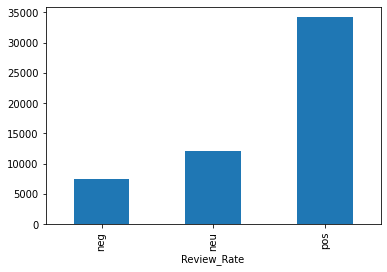

In [21]:
dfFacilities.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In_var = r2.processed[:53678].astype(str)
dep_var = dfFacilities.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=0)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf1)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Facility LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(y_test, predictions, average="weighted"))

clf2 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf2)])
model2.fit(X_train,y_train)
predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score

print('\nAccuracy Facility NB:', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))


from sklearn.svm import LinearSVC
clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Facility SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Facilities DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))


X_train : 42942
X_test : 10736
y_train : 42942
y_test : 10736


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Facility LR: 0.6313338301043219
Precission : 0.964654150534769
Recall : 0.6313338301043219
f1_score : 0.5016275142234357

Accuracy Facility NB: 0.6368293591654247
Precission : 0.9910671394189277
Recall : 0.6368293591654247
f1_score : 0.7752042342057901

Accuracy Facility SVC: 0.6081408345752608
Precission : 0.8534874795193232
Recall : 0.6081408345752608
f1_score : 0.703521572897633

Accuracy Facilities DT : 0.49543591654247393
Precission : 0.5136746999231535
Recall : 0.49543591654247393
f1_score : 0.5040609134134556


**Topic(Sub-group)--Price**

In [23]:
selection = ['Price']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfPrice = r2[mask]
dfPrice

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
440,Hotel Dorchester Park Lane Hyde Park eines ele...,pos,Price,12.0,0.1956,"[hotel, dorchester, park, lane, hyde, park, ei..."
478,"After saving very hard; wanted treat ""once lif...",neu,Price,12.0,0.2506,"[save, hard, want, treat, life, experience, sa..."
552,pleasure Corinthia weeks brand trully luxury s...,pos,Price,12.0,0.1878,"[pleasure, corinthia, week, brand, trully, lux..."
651,I've this before knew exactly what expect. sta...,pos,Price,12.0,0.2427,"[knew, exactly, expect, staff, wonderful, help..."
695,Writing this last day. very impressive through...,pos,Price,12.0,0.3036,"[write, last, day, impressive, drink, pricey, ..."
...,...,...,...,...,...,...
299405,when booked cost know only still cost that was...,pos,Price,12.0,0.2753,"[book, cost, know, still, cost, expect, mini, ..."
299597,everything star quality duvet particularly poo...,neu,Price,12.0,0.2690,"[everything, star, quality, duvet, particularl..."
299634,soul less part city with nothing much around S...,neg,Price,12.0,0.2129,"[soul, less, part, city, nothing, much, around..."
299938,Expensive compared others better quality Showe...,pos,Price,12.0,0.3027,"[expensive, compare, others, well, quality, sh..."


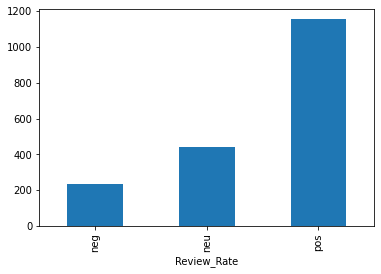

In [24]:
dfPrice.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In_var = r2.processed[:1835].astype(str)
dep_var = dfPrice.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=225)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

tvec = TfidfVectorizer()
clf3 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Price LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,  average="weighted"))

from sklearn.naive_bayes import MultinomialNB
clf4 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf4)])

model2.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions,y_test)

print('\nAccuracy Price NB :', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Price SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Price DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 1468
X_test : 367
y_train : 1468
y_test : 367
Accuracy Price LR: 0.6212534059945504
Precission : 0.946571449280937
Recall : 0.6212534059945504
f1_score : 0.7485857514078612

Accuracy Price NB : 0.6376021798365122
Precission : 1.0
Recall : 0.6376021798365122
f1_score : 0.7787021630615641


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Price SVC: 0.5504087193460491
Precission : 0.6862655912498242
Recall : 0.5504087193460491
f1_score : 0.6058129407344698

Accuracy Price DT : 0.5122615803814714
Precission : 0.5309496111320806
Recall : 0.5122615803814714
f1_score : 0.5210275711035462


**Topic(Sub-group)--Staff**

In [26]:
selection = ['Staff']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfStaff = r2[mask]
dfStaff

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
2,"Rhodes Hotel nights, location taking Paddingto...",pos,Staff,5.0,0.3910,"[rhodes, hotel, night, location, take, padding..."
5,"staff were very helpful, booked wrong mistake ...",pos,Staff,5.0,0.3988,"[staff, helpful, book, wrong, mistake, change,..."
7,What incredibly cool place. most delicious int...,pos,Staff,5.0,0.3196,"[incredibly, cool, place, delicious, interest,..."
10,"looking forward here high expections, what dow...",neg,Staff,5.0,0.2587,"[look, forward, high, expections, connect, tak..."
12,Corinthia that expect when read that five star...,pos,Staff,5.0,0.3822,"[corinthia, expect, read, five, star, spacious..."
...,...,...,...,...,...,...
299995,sauna Jacuzzi Staff were very helpful with tou...,pos,Staff,5.0,0.3264,"[sauna, jacuzzi, staff, helpful, tourist, deta..."
299996,Poor wifi connection Staff cleanliness,pos,Staff,5.0,0.2948,"[poor, wifi, connection, staff, cleanliness]"
299997,minute walk closest metro Very Friendly staff ...,pos,Staff,5.0,0.3911,"[minute, walk, closest, metro, friendly, staff]"
299998,shower cold near beach metro station walking,neu,Staff,5.0,0.2764,"[shower, cold, near, beach, metro, station, walk]"


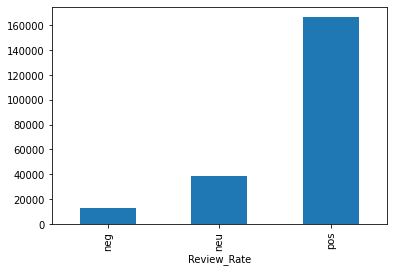

In [27]:
dfStaff.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In_var = r2.processed[:218517].astype(str)
dep_var = dfStaff.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=225)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

tvec = TfidfVectorizer()
clf3 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Staff LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,  average="weighted"))

from sklearn.naive_bayes import MultinomialNB
clf4 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf4)])

model2.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions,y_test)

print('\nAccuracy Staff NB :', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Staff SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Staff DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 174813
X_test : 43704
y_train : 174813
y_test : 43704


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Staff LR: 0.7624016108365367
Precission : 0.9975906358965013
Recall : 0.7624016108365367
f1_score : 0.8641662076256424

Accuracy Staff NB : 0.7620126304228446
Precission : 0.9968507713435021
Recall : 0.7620126304228446
f1_score : 0.8636814418430524

Accuracy Staff SVC: 0.757985539081091
Precission : 0.982487786790182
Recall : 0.757985539081091
f1_score : 0.8548806670855972

Accuracy Staff DT : 0.6449981695039355
Precission : 0.6747144413629849
Recall : 0.6449981695039355
f1_score : 0.6591555026573359


**Topic(Sub-group)--Service**

In [29]:
selection = ['Service']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfService = r2[mask]
dfService

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
1,very lovely first visit this iconic bar! Wonde...,pos,Service,11.0,0.3978,"[lovely, first, visit, iconic, bar, wonderful,..."
3,Form moment arrived until left experienced abs...,pos,"Food, Service",6.0,0.1827,"[form, moment, arrive, left, experienced, abso..."
16,amazing Mondrian wedding. total feedback from ...,pos,Service,11.0,0.2956,"[amaze, mondrian, wedding, total, feedback, ev..."
19,Nice visit didn't feel special. Upgraded super...,neu,"Food, Service",6.0,0.2340,"[nice, visit, feel, special, upgraded, superio..."
25,This most wonderful Every little detail attend...,pos,"Food, Service",6.0,0.2103,"[wonderful, every, little, detail, attend, ala..."
...,...,...,...,...,...,...
299459,complimentary soap bars blocks from beach dail...,pos,Service,3.0,0.2657,"[complimentary, soap, bar, block, beach, daily..."
299598,working getting very there were exausts wash r...,pos,"Comfort, Service",1.0,0.3407,"[work, get, exausts, wash, resturant, didnt, m..."
299647,Everyday make decision between surfing interne...,pos,Service,3.0,0.1614,"[everyday, make, decision, surf, internet, wif..."
299747,Lunch food bland rich flavours menu basicNo Po...,pos,"Comfort, Service",1.0,0.3547,"[lunch, food, bland, rich, flavour, menu, basi..."


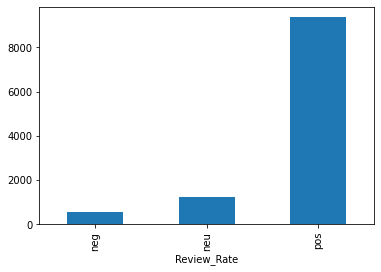

In [30]:
dfService.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In_var = r2.processed[:11122].astype(str)
dep_var = dfService.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=0)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf1)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Service LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,  average="weighted"))

clf2 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf2)])
model2.fit(X_train,y_train)
predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score

print('\nAccuracy Service NB:', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

from sklearn.svm import LinearSVC
clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Service SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Service DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 8897
X_test : 2225
y_train : 8897
y_test : 2225
Accuracy Service LR: 0.844494382022472
Precission : 1.0
Recall : 0.844494382022472
f1_score : 0.915692007797271


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Service NB: 0.8440449438202248
Precission : 0.9975942731983578
Recall : 0.8440449438202248
f1_score : 0.91416322403034
[[   0    0  103]
 [   0    1  242]
 [   0    2 1877]]
              precision    recall  f1-score   support

         neg       0.00      0.00      0.00       103
         neu       0.33      0.00      0.01       243
         pos       0.84      1.00      0.92      1879

    accuracy                           0.84      2225
   macro avg       0.39      0.33      0.31      2225
weighted avg       0.75      0.84      0.77      2225



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Service SVC: 0.8337078651685393
Precission : 0.9716217509734262
Recall : 0.8337078651685393
f1_score : 0.8968407800230497

Accuracy Service DT : 0.7267415730337079
Precission : 0.7313702652536838
Recall : 0.7267415730337079
f1_score : 0.7290247633640735


**Topic(Sub-group)--Comfort**

In [32]:
selection = ['Comfort']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfComfort = r2[mask]
dfComfort

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
92,here nights celebrate Tina's birthday pretty d...,pos,Comfort,8.0,0.1955,"[night, celebrate, tina, birthday, pretty, dam..."
103,Ridgemount Hotel basic cheap. expect more than...,pos,Comfort,8.0,0.2794,"[ridgemount, hotel, basic, cheap, expect, disa..."
135,Enjoyed June Savoy much again September. Lovel...,pos,Comfort,8.0,0.2945,"[enjoy, june, savoy, much, september, lovely, ..."
219,booked this April visited late September. unde...,neu,Comfort,8.0,0.2996,"[book, april, visit, late, september, remodel,..."
244,much other positive reviews this This year som...,pos,Comfort,8.0,0.2330,"[much, positive, review, year, building, do, n..."
...,...,...,...,...,...,...
299747,Lunch food bland rich flavours menu basicNo Po...,pos,"Comfort, Service",1.0,0.3547,"[lunch, food, bland, rich, flavour, menu, basi..."
299752,Reduced opening hours pool sauna hammam restau...,neu,Comfort,8.0,0.2113,"[reduce, opening, hour, pool, sauna, hammam, r..."
299779,Noise from next door when trying sleep Positive,neu,Comfort,8.0,0.4255,"[noise, next, door, try, sleep, positive]"
299897,Very tired dirty carpet very noisy Location,pos,Comfort,8.0,0.3741,"[tire, dirty, carpet, noisy, location]"


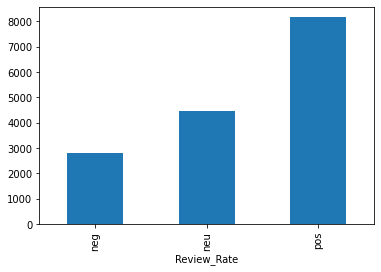

In [33]:
dfComfort.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In_var = r2.processed[:15444].astype(str)
dep_var = dfComfort.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=0)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf1)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Comfort LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,  average="weighted"))

clf2 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf2)])
model2.fit(X_train,y_train)
predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score

print('\nAccuracy Comfort NB:', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

from sklearn.svm import LinearSVC
clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Comfort SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Comfort DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 12355
X_test : 3089
y_train : 12355
y_test : 3089


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Comfort LR: 0.49368727743606344
Precission : 0.7848622550117589
Recall : 0.49368727743606344
f1_score : 0.5959826351976351

Accuracy Comfort NB: 0.5250890255746197
Precission : 0.977945767286335
Recall : 0.5250890255746197
f1_score : 0.6825046835325431
[[   1    2  555]
 [   3    2  886]
 [  13    8 1619]]
              precision    recall  f1-score   support

         neg       0.06      0.00      0.00       558
         neu       0.17      0.00      0.00       891
         pos       0.53      0.99      0.69      1640

    accuracy                           0.53      3089
   macro avg       0.25      0.33      0.23      3089
weighted avg       0.34      0.53      0.37      3089


Accuracy Comfort SVC: 0.4480414373583684
Precission : 0.5481676977656149
Recall : 0.4480414373583684
f1_score : 0.4863074356401928

Accuracy Comfort DT : 0.393331175137585
Precission : 0.3993129676499394
Recall : 0.393331175137585
f1_score : 0.39616965640159896


**Topic(Sub-group)--Food**

In [35]:
selection = ['Food']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfFood = r2[mask]
dfFood

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
3,Form moment arrived until left experienced abs...,pos,"Food, Service",6.0,0.1827,"[form, moment, arrive, left, experienced, abso..."
19,Nice visit didn't feel special. Upgraded super...,neu,"Food, Service",6.0,0.2340,"[nice, visit, feel, special, upgraded, superio..."
25,This most wonderful Every little detail attend...,pos,"Food, Service",6.0,0.2103,"[wonderful, every, little, detail, attend, ala..."
31,Took here treat weekend March what treat was. ...,pos,"Food, Service",6.0,0.2667,"[take, treat, weekend, march, treat, felt, lik..."
40,There reason Savoy Hotel attracting reputation...,pos,"Food, Service",6.0,0.2564,"[reason, savoy, hotel, attract, reputation, su..."
...,...,...,...,...,...,...
299151,Cathedral View obstructed trees Location,pos,"Staff,Location,Food",9.0,0.3979,"[cathedral, view, obstruct, tree, location]"
299156,View church other view blocked tree,pos,"Staff,Location,Food",9.0,0.2542,"[view, church, view, block, tree]"
299244,Breakfast buffet expensive Location beat Rooft...,pos,"Staff,Location,Food",9.0,0.4139,"[breakfast, buffet, expensive, location, beat,..."
299250,Electronic keys were unrelable Wonderful views...,pos,"Staff,Location,Food",9.0,0.2661,"[electronic, key, unrelable, wonderful, view, ..."


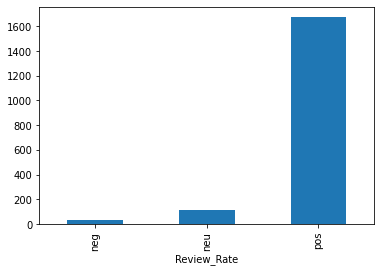

In [36]:
dfFood.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In_var = r2.processed[:1818].astype(str)
dep_var = dfFood.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=0)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf1)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Food LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,average='weighted'))

clf2 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf2)])
model2.fit(X_train,y_train)
predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score

print('\nAccuracy Food NB:', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

from sklearn.svm import LinearSVC
clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Food SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))

clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Food DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 1454
X_test : 364
y_train : 1454
y_test : 364
Accuracy Food LR: 0.9065934065934066
Precission : 1.0
Recall : 0.9065934065934066
f1_score : 0.9510086455331412

Accuracy Food NB: 0.9065934065934066
Precission : 1.0
Recall : 0.9065934065934066
f1_score : 0.9510086455331412
[[  0   0   8]
 [  0   0  26]
 [  0   0 330]]
              precision    recall  f1-score   support

         neg       0.00      0.00      0.00         8
         neu       0.00      0.00      0.00        26
         pos       0.91      1.00      0.95       330

    accuracy                           0.91       364
   macro avg       0.30      0.33      0.32       364
weighted avg       0.82      0.91      0.86       364



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Food SVC: 0.9065934065934066
Precission : 1.0
Recall : 0.9065934065934066
f1_score : 0.9510086455331412


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Food DT : 0.8434065934065934
Precission : 0.865594021363252
Recall : 0.8434065934065934
f1_score : 0.8542885614634493


**Topic(Sub-group)--Location**

In [38]:
selection = ['Location']

mask = r3.apply(lambda x: any(item for item in selection if item in x))
dfLocation = r2[mask]
dfLocation

,Review_Title,Review_Rate,dominant_topic_Label,Dominant_Topic,Topic_Perc_Contrib,processed
0,pleasure this nights recently. This perfect ev...,pos,"Facilities,Location",10.0,0.2093,"[pleasure, night, recently, perfect, every, wa..."
11,Just short mainly focussed around Alain Ducass...,pos,Location,7.0,0.1673,"[short, mainly, focus, around, alain, ducasse,..."
64,Beautiful heart London facing Sloane Street wh...,pos,Location,7.0,0.2235,"[beautiful, heart, london, face, sloane, stree..."
75,here august 2010 would definitely recommend fo...,pos,"Facilities,Location",10.0,0.2663,"[august, 2010, would, definitely, recommend, f..."
82,"Easy find, Lancaster Gate tube short walk away...",pos,"Facilities,Location",10.0,0.3768,"[easy, find, lancaster, gate, tube, short, wal..."
...,...,...,...,...,...,...
299903,lovely clean location taxi ride away from main...,neu,"Facilities,Location",10.0,0.4876,"[lovely, clean, location, taxi, ride, away, ma..."
299941,Location beach easy around stop right outside,pos,"Facilities,Location",10.0,0.5087,"[location, beach, easy, around, stop, right, o..."
299963,Parking easy this area only parking should use...,pos,"Facilities,Location",10.0,0.3596,"[parking, easy, area, parking, useful, expensi..."
299984,Location mins from beach stroll beach front cl...,pos,Location,7.0,0.2516,"[location, min, beach, stroll, beach, front, c..."


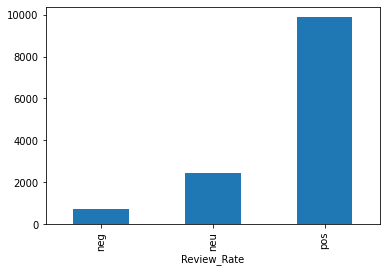

In [39]:
dfLocation.groupby('Review_Rate').Review_Title.count().plot.bar(ylim=0)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In_var = r2.processed[:13046].astype(str)
dep_var = dfLocation.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=0)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf1)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Location LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,  average="weighted"))

clf2 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf2)])
model2.fit(X_train,y_train)
predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score

print('\nAccuracy Location NB:', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

from sklearn.svm import LinearSVC
clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Location SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))


clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Location DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 10436
X_test : 2610
y_train : 10436
y_test : 2610
Accuracy Location LR: 0.7448275862068966
Precission : 0.9909718251000664
Recall : 0.7448275862068966
f1_score : 0.8495093392232382


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Location NB: 0.742911877394636
Precission : 0.9890404815875655
Recall : 0.742911877394636
f1_score : 0.8480206051121543
[[   0    1  150]
 [   0    2  509]
 [   0   11 1937]]
              precision    recall  f1-score   support

         neg       0.00      0.00      0.00       151
         neu       0.14      0.00      0.01       511
         pos       0.75      0.99      0.85      1948

    accuracy                           0.74      2610
   macro avg       0.30      0.33      0.29      2610
weighted avg       0.58      0.74      0.64      2610



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Location SVC: 0.7137931034482758
Precission : 0.8947869302127488
Recall : 0.7137931034482758
f1_score : 0.791314013448933

Accuracy Location DT : 0.6268199233716475
Precission : 0.6461129448870303
Recall : 0.6268199233716475
f1_score : 0.6361382381964724


# **Sentiment analysis classification on whole dataset**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In_var = r2.processed[:300000].astype(str)
dep_var = r2.Review_Rate.astype(str)

X_train,X_test,y_train,y_test= train_test_split(In_var,dep_var,test_size=0.2,random_state=0)

print('X_train :', len(X_train))
print('X_test :', len(X_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf1 = LogisticRegression(solver ='lbfgs')
model1 = Pipeline([('Vectorizer', tvec),('classifier',clf1)])

model1.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)
confusion_matrix = (predictions,y_test)

print('Accuracy Location LR:', accuracy_score(predictions,y_test))
print('Precission :', precision_score(predictions,y_test,average ='weighted'))
print('Recall :', recall_score(predictions,y_test,average='weighted'))
print('f1_score :',f1_score(predictions,y_test,  average="weighted"))

clf2 = MultinomialNB()
model2 = Pipeline([('Vectorizer', tvec),('classifier',clf2)])
model2.fit(X_train,y_train)
predictions_NB = model2.predict(X_test)
confusion_matrix_NB = (predictions_NB,y_test)


from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score

print('\nAccuracy Location NB:', accuracy_score(predictions_NB,y_test))
print('Precission :', precision_score(predictions_NB,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_NB,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_NB,y_test,  average="weighted"))


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test,predictions_NB))

from sklearn.svm import LinearSVC
clf3=LinearSVC()
model3 = Pipeline([('Vectorizer', tvec),('classifier',clf3)])
model3.fit(X_train,y_train)
predictions_SVC = model3.predict(X_test)
confusion_matrix_SVC = (predictions_SVC,y_test)

print('\nAccuracy Location SVC:', accuracy_score(predictions_SVC,y_test))
print('Precission :', precision_score(predictions_SVC,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_SVC,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_SVC,y_test,  average="weighted"))


clf5 = DecisionTreeClassifier()
model4 = Pipeline([('Vectorizer', tvec),('classifier',clf5)])

model4.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

predictions_DT = model4.predict(X_test)
confusion_matrix_DT = (predictions_DT,y_test)

print('\nAccuracy Location DT :', accuracy_score(predictions_DT,y_test))
print('Precission :', precision_score(predictions_DT,y_test,average ='weighted'))
print('Recall :', recall_score(predictions_DT,y_test,average='weighted'))
print('f1_score :',f1_score(predictions_DT,y_test,  average="weighted"))

X_train : 240000
X_test : 60000
y_train : 240000
y_test : 60000


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Location LR: 0.7221166666666666
Precission : 0.8911927437474031
Recall : 0.7221166666666666
f1_score : 0.7908907842466021

Accuracy Location NB: 0.73005
Precission : 0.9887330795032107
Recall : 0.73005
f1_score : 0.8388936366295267
[[   10    74  4690]
 [    5    90 11216]
 [   47   165 43703]]
              precision    recall  f1-score   support

         neg       0.16      0.00      0.00      4774
         neu       0.27      0.01      0.02     11311
         pos       0.73      1.00      0.84     43915

    accuracy                           0.73     60000
   macro avg       0.39      0.34      0.29     60000
weighted avg       0.60      0.73      0.62     60000


Accuracy Location SVC: 0.72135
Precission : 0.8936894745124359
Recall : 0.72135
f1_score : 0.7916250900724888

Accuracy Location DT : 0.65235
Precission : 0.6789107994604467
Recall : 0.65235
f1_score : 0.6647880004335245


Result : Naive Bayes classifiers produced high accuracy compared with SVM,LR and DT